## Predicting stock prices

1) Micro - Hard financial data, what a stock is actually worth

2) Macro - Data on competition, on shifting consumer markets, on governmntal policy

3) Rumour mill - perception of stock, perception/ preditions for politics

4) Trading patterns







# Micro

This can be short term: financial reports

This can be long term: true worth of a company

##### short term 
maybe more perception than micro...

This may not involve machine learning. It is more based on seeing new figures comparing them to older ones, or to the predicted ones and deciding whether there will be nan up tick or not. At which point you want to buy as quickly as possible.

This will involve automation.
This does involve automation. (Trading platforms are pretty much a form of automation)

##### Long term
P/e ratio

expected growth

liquidity

valuation

ceo

investments

(tbh I don't know too much)



This can very much be done by machine learning. 


Of course if you only looked at micro there will be external (macro) impacts. SO that you would need to diversify your portfolio if this were the case.



# Macro

This can again be short term: interest rates increased

This can be long term: shifts in consumer trends, electric vs oil

##### short term 

Inflation rates, interest rates , gdp projections, competition projections, costs of raw materials


This may involve machine learning. Predicted what will affect what. Or whether one leads another. The issue here as that you may be unsure what variables to include, and you may leave some out that will have a large effect. i.e. qualcomm/ broadcomm security. Due to the large array of variables that might be required, despite only be useful in select circumstances this will be difficult. 

This will involve automation. Difficult automation though as you will have to automate the scraping of a large large variety of different report and downloadable pdfs. If your scraper selects the wrong thing, this could cause large problems.

##### Long term

will there be a recession? How is the bond market doing? Industry shifts? What university degrees are most common?

Again there is so much that goes into this, that it is hard to get 'every variable' and hard to know which will be needed.
As in a CEO has a sex scandal (as they do...) how will your model account for that? You will find it hard to get statistics on the health of a CEO's marriage. Youc could perhaps find a way to determine the proportion of a CEO's asistants that are women? But this is flimsy. Can you imagine telling your boss that you want to short sell tesla because he has a more than equal diversity representation, and that your programme determined from their instagram photos that they are 12% more attractive than the average person.

More data is always better... but some data you can't get. Some you cant legally use. And some you will find too diffiuclt to interpret.

This is an area that I think is possible for machine learning, but not yet. Tis requires more data, better processors and better algorithms. Or an artificial intelligence that mimics the way the brain works (i.e. instead of remembering every piece of data that it has ever seen it can summarize and associate with ease.

A Long term combination of micro and macro is pretty much the warren buffet approach

# Rumour mill

There may be some long term cases, but for most part this is short term.


This is investing based on articles on tweets, on speeches, on tabloids about political figures

i.e. Trump says something in his speech about China, this will increase likelihood of trade tensions, which will decrease the chances of Apple increasing iphone sales there

It may be difficult for a computer to interpret meaning and effect of a particular statement. However you can monitor for sentimentality and content matter.

e.g. if you use a speech to text converter and see that china and trade are mentioned in close proximity with negative sentimentality and with a severe tone. you may want to short Hasbro or other Chinese dependent companies or invest in US steel




This like the other short terms requires a quick action. Which means that automation is beneficial. And good internet (The hummingbird project).

# Trading patterns





### Random walk

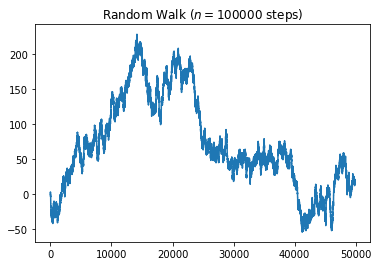

In [4]:
import numpy
import pylab
import random

n = 100000

x = numpy.zeros(n)
y = numpy.zeros(n)

for i in range(1, n):
    val = random.randint(1, 4)
    if val == 1:
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1]
    elif val == 2:
        x[i] = x[i - 1] + 1 # change from + to -
        y[i] = y[i - 1]
    elif val == 3:
        x[i] = x[i - 1]
        y[i] = y[i - 1] + 1
    else:
        x[i] = x[i - 1]
        y[i] = y[i - 1] - 1
    

#plotting stuff:
pylab.title("Random Walk ($n = " + str(n) + "$ steps)")
pylab.plot(x, y)
pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600)
pylab.show()

Of course this is 'entirely random'

The buying and selling of stocks has patterns and is based on psycology 

1) long run: tulips, bitcoin

2) short run: loss aversion   (we are not as 'unique' as we think)


Even trading algorithms can be 'predicted' and there has been in the past people who have taken advantage of algorithmic traders


Predicting how a stock is going to go based on just what its line looks like is random. As random as a flip of the coin or the random walk. What I mean is that it isn't actually random. The coin is a series of equations. And computer generated random numbers arent technically random, they only appear so to the user.

These patterns are impossible for the naked eye to see, but perhaps a deep learning algorithm going through millions of stocks and stock instances could figure something out.

This will involve a lot of high frequency trading.

# Which is best?

Not a particularly original answer, but a combination

### So what are we going to do?

Not a particularly original answer, but a combination

First we want to think about what data we want and how we will display it

First we want a way to get our data and we want rather a lot of data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup
import webbrowser
import requests
import selenium
from newsapi import NewsApiClient
from textblob import TextBlob

In [8]:
cols=['name', 'curr', 'ceo', 'sector', 'industry', 'employees', 'mark_cap', 'pe_ratio', '1','2','3','4','5','6','7','8','9','10']
for i in range(45): cols.append('stat' + str(i))
for i in range(20): cols.append('sent' + str(i))
data = pd.DataFrame(columns=cols)

headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'max-age=0',
    'Pragma': 'no-cache',
    'Referrer': 'https://google.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36'
}

In [9]:
tickers ="""AAPL ABBV ABT ACN ADBE AGN AIG ALL AMGN AMZN AXP BA BAC BIIB BK BKNG BLK BMY C CAT CELG
CHTR
CL
CMCSA
COF
COP
COST
CSCO
CVS
CVX
DD
DHR
DIS
DOW
DUK
EMR
EXC
F
FB
FDX
GD
GE
GILD
GM 
GOOG
GOOGL
GS
HD
HON
IBM
INTC
JNJ
JPM
KHC
KMI
KO
LLY LMT LOW MA
MCD
MDLZ
MDT
MET
MMM
MO
MRK
MS
MSFT
NEE
NFLX
NKE
NVDA
ORCL
OXY
PEP
PFE
PG
PM
PYPL
QCOM
RTN
SBUX
SLB
SO
SPG
T
TGT
TXN
UNH
UNP
UPS
USB
UTX
V
VZ
WBA
WFC
WMT
XOM""".split()

In [10]:
def yahoo_something(ticker, headers, data):
    base_url = "https://uk.finance.yahoo.com/quote/{code}".format(code=ticker)
    result = requests.get(base_url,headers).content
    tree = html.fromstring(result)
    name = str(tree.xpath("//h1/text()")[0])
    curr = str(tree.xpath('//*[@id="quote-summary"]/div[1]/table/tbody/tr[4]/td[2]/span/text()')[0]).split()[0]
    mark_cap = str(tree.xpath('//*[@id="quote-summary"]/div[2]/table/tbody/tr[1]/td[2]/span/text()')[0])
    pe_ratio= str(tree.xpath('//*[@id="quote-summary"]/div[2]/table/tbody/tr[3]/td[2]/span/text()')[0])
    
    result = requests.get("{url}/history".format(url = base_url),headers).content
    soup = BeautifulSoup(result, 'html.parser')
    tables = soup.find(class_="W(100%) M(0)")
    list_=[]
    for i, table in enumerate(tables):
        if i==1: break
    for i, row in enumerate(table):
        if i==0: continue
        elif len(list_)==10: break
        for j, col in enumerate(row):
            if j==4:
                list_.append(col.text)
                break
     
                
    result = requests.get("{url}/profile".format(url = base_url),headers).content
    soup = BeautifulSoup(result, 'html.parser')
    
    factors = soup.find_all(class_="Fw(600)")
    sector = factors[0].text
    industry = factors[1].text
    try: 
        employees = factors[2].text
    except:
        employees = 10
    tables = soup.find_all(class_="Bxz(bb) quote-subsection undefined")
    ceo = tables[0].find_all(class_="Ta(start)")[2].text
    ceo = ceo[4:]
    
    

    result = requests.get("{url}/balance-sheet?p=mft.nz".format(url = base_url), headers).content
    tree = html.fromstring(result)
    table_rows = tree.xpath("//div[contains(@class, 'D(tbr)')]")
    parsed_rows = []
    for table_row in table_rows:
        parsed_row = []
        el = table_row.xpath("./div")
        try:
            (text,) = el[1].xpath('.//span/text()[1]')
        except ValueError:
            text=0
        parsed_rows.append(text)
    
    
    
    
    newsapi = NewsApiClient(api_key='5f2bbf0a0c73474eb46b3e43f900e4e5')
    res = newsapi.get_everything(q="aapl",
                                  from_param='2019-12-03',
                                  to='2019-12-03',
                                  language='en',
                                  sort_by='relevancy')

    list__=[]
    for j,i in enumerate(res['articles']):
        chin = TextBlob(i['title']).sentiment
        list__.append(chin[0])
        list__.append(chin[1])
        if j==9: break
    
    
    
    
    data.loc[ticker] = [name, curr, ceo, sector, industry, employees, mark_cap, pe_ratio] + list_ + parsed_rows + list__
    
    
    
    return data

In [376]:
yahoo_something('aapl', headers, data)

,name,curr,ceo,sector,industry,employees,mark_cap,pe_ratio,1,2,...,sent10,sent11,sent12,sent13,sent14,sent15,sent16,sent17,sent18,sent19
all,ALL - The Allstate Corporation,109.13,Thomas Joseph Wilson II,Financial Services,Insurance—Property & Casualty,"45,140",35.344B,14.90,111.14,111.35,...,-0.5,0.5,0.55,0.95,0.0,0.0,0.0,0.4,0.25,0.333333
aapl,AAPL - Apple Inc.,257.90,Timothy D. Cook,Technology,Consumer Electronics,"137,000",1.165T,21.68,264.16,267.25,...,-0.5,0.5,0.55,0.95,0.0,0.0,0.0,0.4,0.25,0.333333


In [13]:
data2=data.copy()
for ticker in tickers:
    print(ticker)
    data2 = yahoo_something(ticker, headers, data2)

AAPL
ABBV
ABT
ACN
ADBE


KeyboardInterrupt: 

In [12]:
from lxml import html

In [14]:
data2

,name,curr,ceo,sector,industry,employees,mark_cap,pe_ratio,1,2,...,sent10,sent11,sent12,sent13,sent14,sent15,sent16,sent17,sent18,sent19
AAPL,AAPL - Apple Inc.,258.24,Timothy D. Cook,Technology,Consumer Electronics,"137,000",1.168T,21.74,264.16,267.25,...,0.0,0.0,0.25,0.333333,0.0,0.0,0.35,0.65,0.0,0.0
ABBV,ABBV - AbbVie Inc.,85.85,Richard A. Gonzalez,Healthcare,Drug Manufacturers—General,"30,000",126.715B,39.36,87.03,87.73,...,0.0,0.0,0.25,0.333333,0.0,0.0,0.35,0.65,0.0,0.0
ABT,ABT - Abbott Laboratories,84.10,Miles D. White M.B.A.,Healthcare,Medical Devices,"103,000",148.674B,45.69,84.51,85.45,...,0.0,0.0,0.25,0.333333,0.0,0.0,0.35,0.65,0.0,0.0
ACN,ACN - Accenture plc,198.75,David P. Rowland,Technology,Information Technology Services,"492,000",126.264B,26.98,199.59,201.16,...,0.0,0.0,0.25,0.333333,0.0,0.0,0.35,0.65,0.0,0.0
